In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Dataset: https://www.kaggle.com/blastchar/telco-customer-churn

The data set includes information about:

* Customers who left within the last month – the column is called Churn
* Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
* Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
* Demographic info about customers – gender, age range, and if they have partners and dependents


In [115]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [116]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### Shape of Data

In [117]:
df.shape

(7043, 21)

We have 21 variables and 7043 observations. As we aim to predict whether customer leaves or not, Churn column is dependent variable.

### Our variables

In [118]:
list(df.columns)

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'tenure',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [119]:
cats = list(df.select_dtypes(include=['object']).columns)
nums = list(df.select_dtypes(exclude=['object']).columns)
print(f'Categorical variables:  {cats}\n')
print(f'Numerical variables:  {nums}')

Categorical variables:  ['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges', 'Churn']

Numerical variables:  ['SeniorCitizen', 'tenure', 'MonthlyCharges']


We have only 3 numerical variables.

In [120]:
df[cats].nunique(axis=0)

customerID          7043
gender                 2
Partner                2
Dependents             2
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
TotalCharges        6531
Churn                  2
dtype: int64

In [121]:
df["TotalCharges"].head()

0      29.85
1     1889.5
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: object

We discover that TotalCharges columns is not categorical but needs manipulation. And we don't have duplicate users. 

### Do we have missing value?

In [122]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

we see that there is no NAN value above but is it true?

In [123]:
df.isin([" ", ""]).sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

TotalCharges has empty whitespace which means NAN.

There are two solutions for missing values.
* Dropping missing values
* Missing value imputation

There can be simply removed the missing observations because it's only 0.15% of all data.

In [124]:
df['TotalCharges'] = df["TotalCharges"].replace(" ",np.nan)

In [125]:
df.dropna(inplace=True) # dropna
df.reset_index(drop=True, inplace=True)

In [126]:
df["TotalCharges"] = df["TotalCharges"].astype(float) # now type of TotalCharges is float

In [127]:
df.to_csv("clean_data.csv",index=False)

## Categorical Variables

In [128]:
cats = [cat for cat in cats if cat not in["customerID", "TotalCharges"]]

for col in cats:
    print(f"{col} : {df[col].unique()}")

gender : ['Female' 'Male']
Partner : ['Yes' 'No']
Dependents : ['No' 'Yes']
PhoneService : ['No' 'Yes']
MultipleLines : ['No phone service' 'No' 'Yes']
InternetService : ['DSL' 'Fiber optic' 'No']
OnlineSecurity : ['No' 'Yes' 'No internet service']
OnlineBackup : ['Yes' 'No' 'No internet service']
DeviceProtection : ['No' 'Yes' 'No internet service']
TechSupport : ['No' 'Yes' 'No internet service']
StreamingTV : ['No' 'Yes' 'No internet service']
StreamingMovies : ['No' 'Yes' 'No internet service']
Contract : ['Month-to-month' 'One year' 'Two year']
PaperlessBilling : ['Yes' 'No']
PaymentMethod : ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn : ['No' 'Yes']


In [129]:
replace_cols = [ 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                'TechSupport','StreamingTV', 'StreamingMovies']
for i in replace_cols : 
    df[i]  = df[i].replace({'No internet service' : 'No'})
    
df["MultipleLines"] = df["MultipleLines"].replace({'No phone service' : 'No'})
df["SeniorCitizen"] = df["SeniorCitizen"].astype(str).replace({'1' : 'Yes', "0": "No"})

We replace "No internet service" with No and "No phone service" with No.

In [130]:
df["ExtraCharges"] = df["TotalCharges"] - (df["MonthlyCharges"] * df["tenure"])
df["ExtraCharges"]

0         0.00
1       -46.80
2         0.45
3       -62.75
4        10.25
         ...  
7027    -44.70
7028    -67.50
7029     20.85
7030      9.00
7031   -128.40
Name: ExtraCharges, Length: 7032, dtype: float64

We simply calculate the extra charges by differecing totalcharges and monthlycharges multiplied by tenure.

In [131]:
cats.append("SeniorCitizen")

# EDA

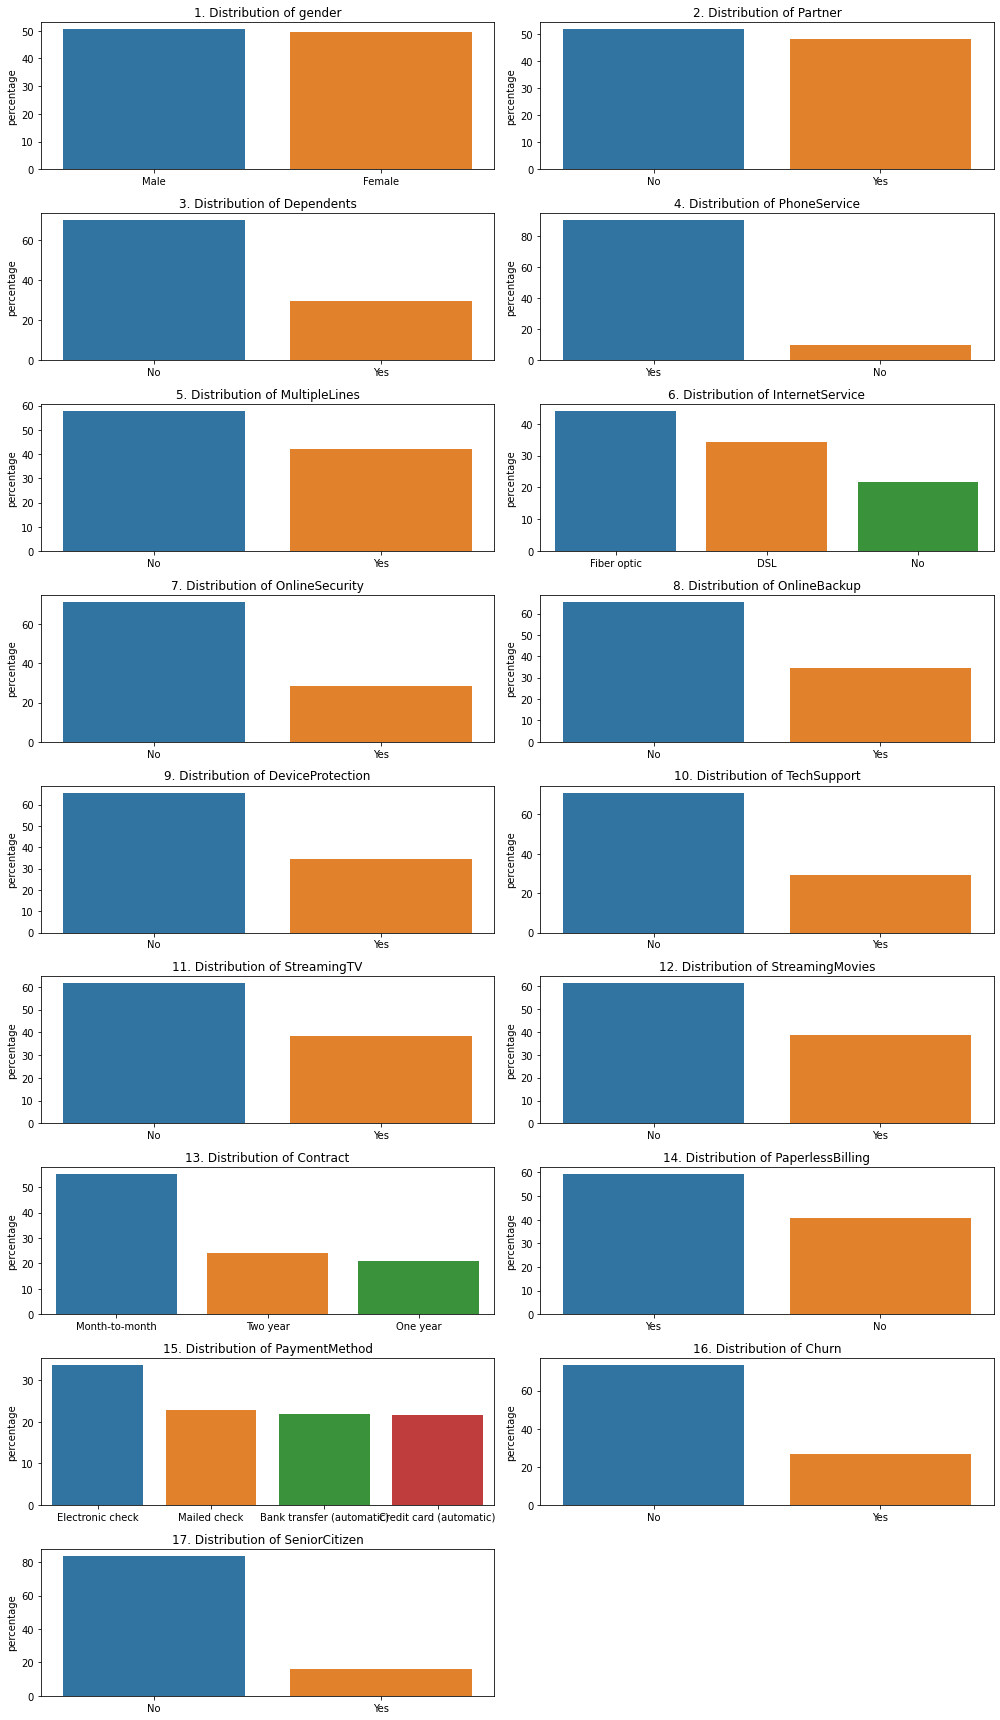

In [132]:
fig = plt.figure(1, (14, 24))

for i,cat in enumerate(cats):
    ax = plt.subplot(9,2,i+1)
    p = df[cat].value_counts(normalize=True).rename("percentage").reset_index()
    p["percentage"] = p["percentage"] * 100
    sns.barplot(x="index", y="percentage", data=p)
    ax.set_xlabel(None)
    ax.set_title(f'{i+1}. Distribution of {cat}')
    plt.tight_layout()

plt.show()


# Distribution of variables on Churns

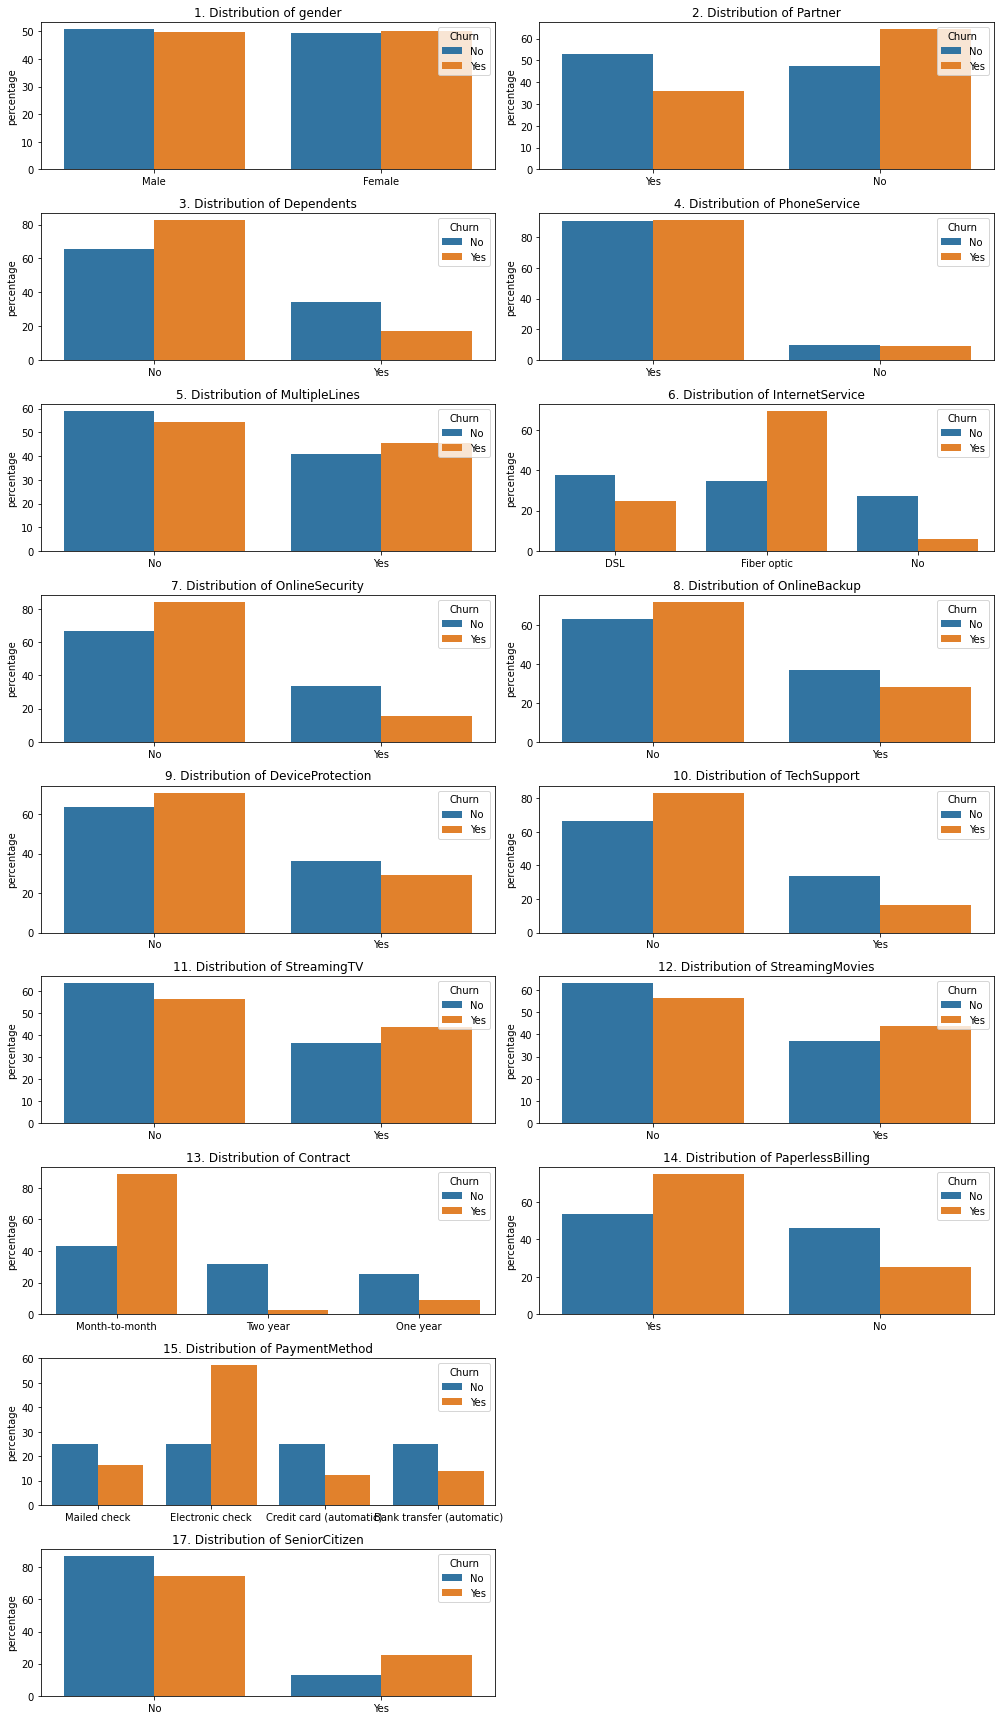

In [133]:
fig = plt.figure(1, (14, 24))

for i,cat in enumerate(cats):
    if not cat == "Churn":
        ax = plt.subplot(9,2,i+1)
        p = df[cat].groupby(df["Churn"]).value_counts(normalize=True).rename("percentage").reset_index()
        p["percentage"] = p["percentage"] * 100
        sns.barplot(x=cat, y="percentage",hue="Churn", data=p)
        ax.set_xlabel(None)
        ax.set_title(f'{i+1}. Distribution of {cat}')
        plt.tight_layout()

plt.show()


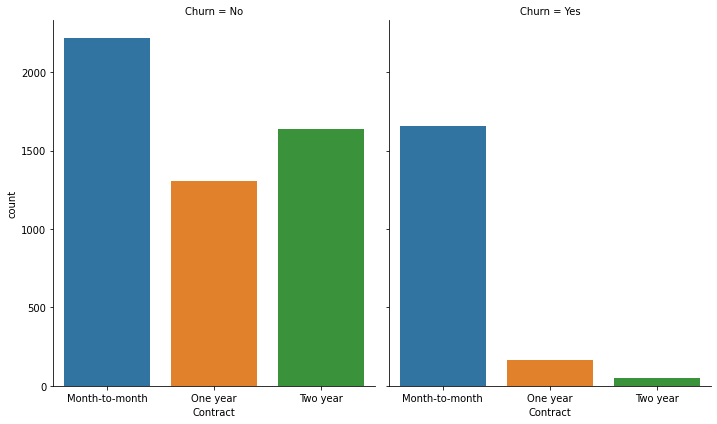

In [134]:
g = sns.catplot(x="Contract" , col="Churn", col_wrap=4,
                data=df,
                kind="count", height=6, aspect=.8)

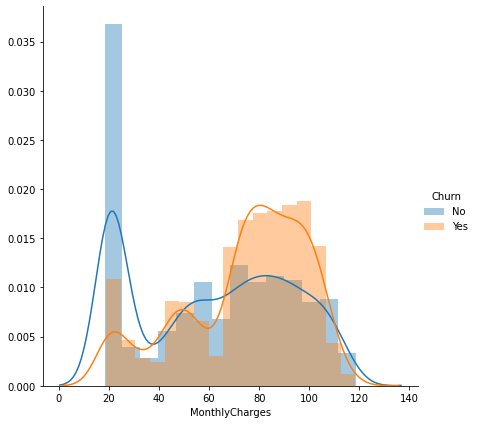

In [135]:
g = sns.FacetGrid(df, hue="Churn",height=6)
g = g.map(sns.distplot, "MonthlyCharges")
g.add_legend(title="Churn") 

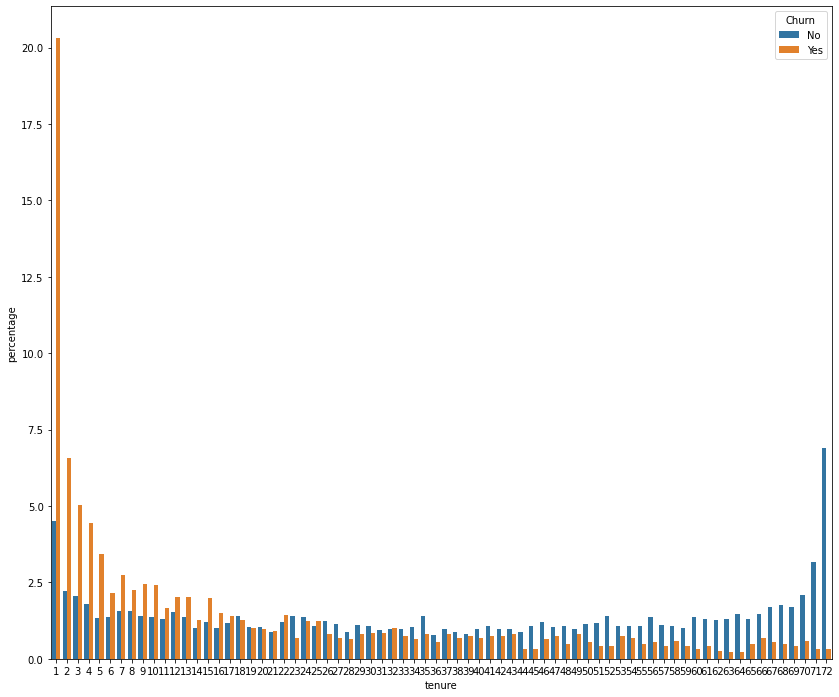

In [136]:
fig = plt.figure(1, (14, 12))
p = df["tenure"].groupby(df["Churn"]).value_counts(normalize=True).rename("percentage").reset_index()
p["percentage"] = p["percentage"] * 100
ax = sns.barplot(x="tenure", y="percentage",hue="Churn", data=p)
plt.show()

In [137]:
df["tenure_year"] = np.floor(df["tenure"].astype(float) / 12)

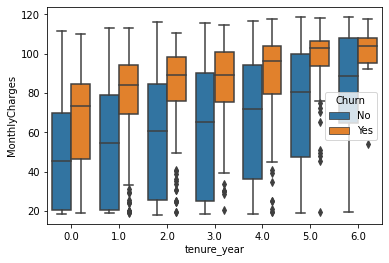

In [138]:
ax = sns.boxplot(x="tenure_year", y="MonthlyCharges", hue="Churn", data=df)

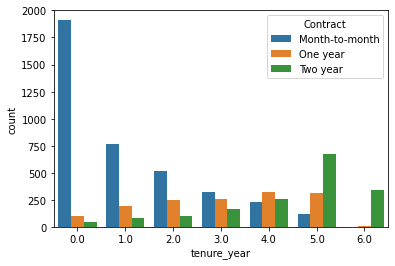

In [139]:
sns.countplot("tenure_year", hue="Contract", data = df )

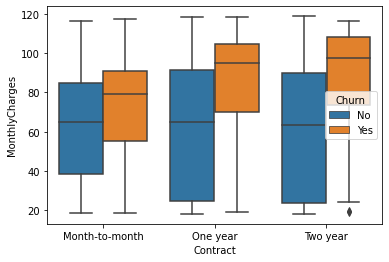

In [140]:
ax = sns.boxplot(x="Contract", y="MonthlyCharges", hue="Churn", data=df)

# Modelling

In [141]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'ExtraCharges', 'tenure_year'],
      dtype='object')

In [142]:
binary_variables = df.nunique()[df.nunique() == 2].keys().tolist()
#ts = df.copy()
for i in binary_variables :
    if i not in ["gender", "Depedents"]:
        df[i]  = df[i].replace({"No" : 0, "Yes": 1})

In [144]:
df = df.rename(columns={"gender": "is_male"})
df["is_male"] = df["is_male"].replace({"Male":1, "Female":0})

In [145]:
df

,customerID,is_male,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,ExtraCharges,tenure_year
0,7590-VHVEG,0,0,1,0,1,0,0,DSL,0,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,0.00,0.0
1,5575-GNVDE,1,0,0,0,34,1,0,DSL,1,...,0,0,One year,0,Mailed check,56.95,1889.50,0,-46.80,2.0
2,3668-QPYBK,1,0,0,0,2,1,0,DSL,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,0.45,0.0
3,7795-CFOCW,1,0,0,0,45,0,0,DSL,1,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,-62.75,3.0
4,9237-HQITU,0,0,0,0,2,1,0,Fiber optic,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,10.25,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,6840-RESVB,1,0,1,1,24,1,1,DSL,1,...,1,1,One year,1,Mailed check,84.80,1990.50,0,-44.70,2.0
7028,2234-XADUH,0,0,1,1,72,1,1,Fiber optic,0,...,1,1,One year,1,Credit card (automatic),103.20,7362.90,0,-67.50,6.0
7029,4801-JZAZL,0,0,1,1,11,0,0,DSL,1,...,0,0,Month-to-month,1,Electronic check,29.60,346.45,0,20.85,0.0
7030,8361-LTMKD,1,1,1,0,4,1,1,Fiber optic,0,...,0,0,Month-to-month,1,Mailed check,74.40,306.60,1,9.00,0.0


In [151]:
df = pd.get_dummies(data = df,  columns= ["InternetService", "PaymentMethod", "Contract"], drop_first=True )

In [166]:
categories_binary = df.nunique()[df.nunique() == 2].keys().tolist()

In [165]:
from scipy.spatial.distance import jaccard, sokalmichener
import itertools

In [172]:
func = lambda i, j: sokalmichener(df[i], df[j])
result = [(i, j, func(i,j)) for i, j in itertools.product(categories_binary, categories_binary)]




In [176]:
from collections import defaultdict

d = defaultdict(list)

for i, j, x in result:
    d[i].append(x)

sm = pd.DataFrame(d, index=categories_binary)

In [177]:
sm

,is_male,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,StreamingMovies,PaperlessBilling,Churn,InternetService_Fiber optic,InternetService_No,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_One year,Contract_Two year
is_male,0.000000,0.670071,0.667425,0.664134,0.665275,0.671202,0.674958,0.673458,0.668308,0.671829,...,0.671955,0.671076,0.671955,0.672080,0.667298,0.668434,0.667677,0.664007,0.666287,0.670197
SeniorCitizen,0.670071,0.000000,0.650417,0.606283,0.870361,0.566507,0.538805,0.542137,0.544099,0.549206,...,0.552342,0.671955,0.452975,0.536220,0.533472,0.480061,0.495990,0.533472,0.482193,0.530254
Partner,0.667425,0.650417,0.000000,0.444936,0.674333,0.598366,0.599203,0.598645,0.593178,0.609315,...,0.609727,0.675582,0.716320,0.664261,0.657887,0.626563,0.695846,0.693787,0.626428,0.556354
Dependents,0.664134,0.606283,0.444936,0.000000,0.797229,0.648212,0.551298,0.598645,0.602405,0.560344,...,0.641422,0.739672,0.640897,0.710080,0.500160,0.532248,0.665401,0.538805,0.526250,0.480553
PhoneService,0.665275,0.870361,0.674333,0.797229,0.000000,0.649899,0.821222,0.780331,0.784653,0.819936,...,0.749756,0.591910,0.813665,0.632970,0.814565,0.844276,0.773952,0.837494,0.847402,0.829658
MultipleLines,0.671202,0.566507,0.598366,0.648212,0.649899,0.000000,0.594162,0.551596,0.551745,0.593741,...,0.527021,0.606283,0.616837,0.474455,0.702463,0.602544,0.606697,0.711262,0.626428,0.585964
OnlineSecurity,0.674958,0.538805,0.599203,0.551298,0.821222,0.594162,0.000000,0.475612,0.479403,0.418887,...,0.539867,0.702463,0.638001,0.656092,0.669064,0.502874,0.646912,0.585822,0.506213,0.478910
OnlineBackup,0.673458,0.542137,0.598645,0.598645,0.780331,0.551596,0.475612,0.000000,0.478745,0.471138,...,0.505420,0.638924,0.631907,0.574643,0.718776,0.547107,0.620094,0.653261,0.547858,0.544401
DeviceProtection,0.668308,0.544099,0.593178,0.602405,0.784653,0.551745,0.479403,0.478745,0.000000,0.450760,...,0.436117,0.648991,0.625086,0.569569,0.717958,0.537894,0.621041,0.657503,0.539564,0.520358
TechSupport,0.671829,0.549206,0.609315,0.560344,0.819936,0.593741,0.418887,0.471138,0.450760,0.000000,...,0.495346,0.686099,0.637341,0.652357,0.672205,0.504307,0.649121,0.589651,0.510169,0.458402


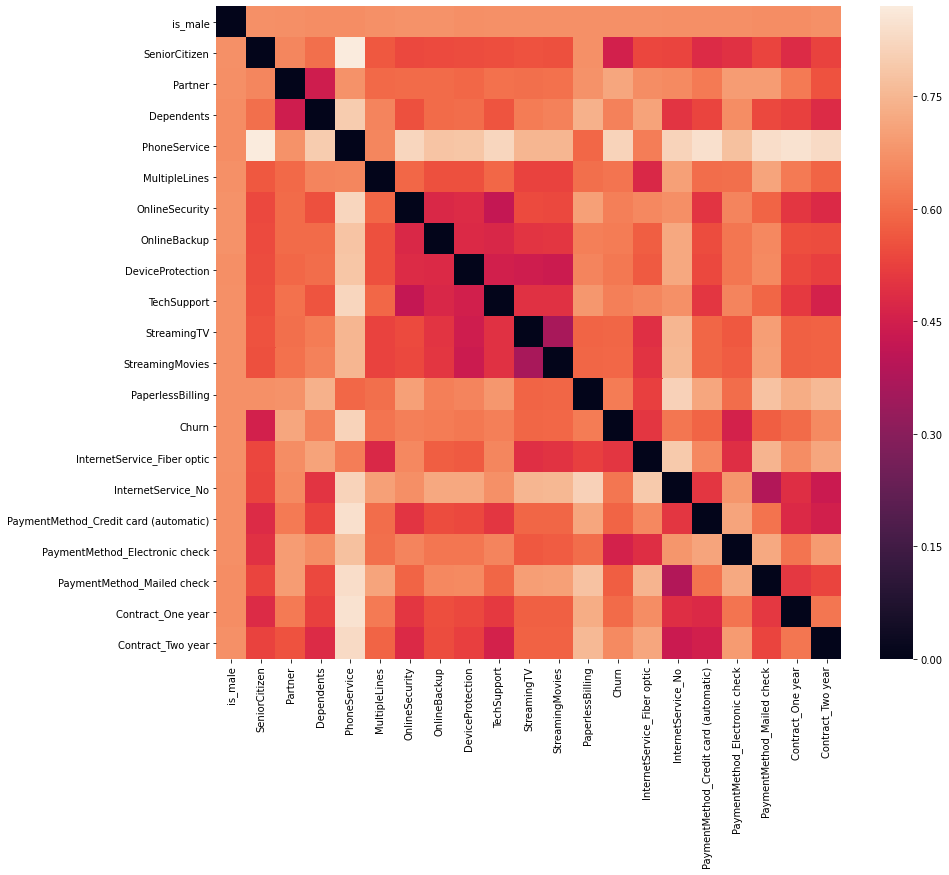

In [182]:
fig = plt.figure(1, (14, 12))
ax = sns.heatmap(sm)
plt.show()

In [185]:
features = ['InternetService_Fiber optic',
       'InternetService_No', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year', 'PaperlessBilling', 'StreamingTV', 'TechSupport',
       'MultipleLines', 'Dependents', 'SeniorCitizen', 'is_male', 'tenure', 'MonthlyCharges', 'ExtraCharges']

dependent_variable = ["Churn"] 

17

In [190]:
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split

In [191]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[dependent_variable], test_size=0.2, random_state=42, stratify=df[dependent_variable])

In [194]:
log = LogisticRegression(random_state=0)

In [199]:
log.fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [203]:
pred = log.predict(X_test)

In [206]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred)) 

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.54      0.58       374

    accuracy                           0.80      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [224]:
for f,coef in zip(features, log.coef_[0]):
    print(f"{f} : {coef}")

InternetService_Fiber optic : 1.0002811613607905
InternetService_No : -0.963366955767734
PaymentMethod_Credit card (automatic) : 0.08853530941519039
PaymentMethod_Electronic check : 0.4721558660092059
PaymentMethod_Mailed check : 0.15595288494177964
Contract_One year : -0.7753056550101073
Contract_Two year : -1.3782946286347648
PaperlessBilling : 0.33174604363404764
StreamingTV : 0.48751543480904763
TechSupport : -0.3230406548398771
MultipleLines : 0.3265706287527571
Dependents : -0.25979674200134134
SeniorCitizen : 0.23993195859082078
is_male : -0.0070383020791008645
tenure : -0.03278291890284175
MonthlyCharges : -0.005851668130128643
ExtraCharges : 0.0005659059717954115
